In [ ]:
# In this project, we wiil be using again the 2019 Index of Economic Freedom (ief) public data (https://www.heritage.org/index/)
# However, the problem definition now is quite different
# Instead on the new metrics, we will be focusing on established criteria for economic development such as:
    # GDP, GDP Growth, Infaltion, etc.
# The motivation behind is as follows:
    # Most people are not economic experts, yet we often hear and use terms like 
        # poorly-developed country, well-developed country, world economic powers
    # So, the questions we can ask are:
        # what is the basis for such segmentation of the worlds countries?
        # how accurate is this segmentation?
# Thus we can postulate two different problems:
    # 1) Clustering problem: 
        # based on the economic features how many groups the countries can be separated in?
        # how many countries are in each group?
    # 2) Classification problem:
        # based on the economic features can we determine/predict which group different countries belong to?

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5)

In [2]:
# read ief data

data = pd.read_excel('index2019_data.xls')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
CountryID                      186 non-null int64
Country Name                   186 non-null object
WEBNAME                        186 non-null object
Region                         186 non-null object
World Rank                     180 non-null float64
Region Rank                    180 non-null float64
2019 Score                     180 non-null float64
Property Rights                185 non-null float64
Judical Effectiveness          185 non-null float64
Government Integrity           185 non-null float64
Tax Burden                     180 non-null float64
Gov't Spending                 183 non-null float64
Fiscal Health                  183 non-null float64
Business Freedom               185 non-null float64
Labor Freedom                  184 non-null float64
Monetary Freedom               184 non-null float64
Trade Freedom                  182 non-null float64
Investment Freed

In [3]:
data.head(5)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,69.6,2.505,2.9,1957.58,8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,36,3.900,2.5,12506.6,13.9,2.0,1119.1,71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,632.9,2.000,3.1,15237.2,10,5.6,1203.0,25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,190.3,0.700,2.9,6752.58,8.2,31.7,-2254.5,65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,920.2,2.900,0.7,20875.8,8.7,25.7,11857.0,52.6


In [4]:
data.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [ ]:
# as postulated above, we will focus on well-known and established economic criteria such as 
    # 'World Rank', 'GDP Growth Rate (%)', 'GDP per Capita (PPP)','Unemployment (%)', 'Inflation (%)', 'Public Debt (% of GDP)'
    # since the World Ranking is done by total GDP we select only 'World Rank', which we will use later for creating labels
# using these features, we will try to answer the questions posted above

In [5]:
# select the established economic criteria as features

data = data[['GDP per Capita (PPP)', 'GDP Growth Rate (%)', 'Unemployment (%)', 'Inflation (%)', 
             'Public Debt (% of GDP)', 'World Rank']]

data.head(5)

,GDP per Capita (PPP),GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP),World Rank
0,1957.58,2.505,8.8,5.0,7.3,152.0
1,12506.6,3.900,13.9,2.0,71.2,52.0
2,15237.2,2.000,10,5.6,25.8,171.0
3,6752.58,0.700,8.2,31.7,65.3,156.0
4,20875.8,2.900,8.7,25.7,52.6,148.0


In [6]:
# one can check for nulls/missing data by calling .info() on data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
GDP per Capita (PPP)      184 non-null object
GDP Growth Rate (%)       184 non-null float64
Unemployment (%)          181 non-null object
Inflation (%)             182 non-null float64
Public Debt (% of GDP)    182 non-null float64
World Rank                180 non-null float64
dtypes: float64(4), object(2)
memory usage: 8.8+ KB


In [ ]:
# there are total of 186 rows and each column has few nulls (the difference between non-null rows and total number of rows)

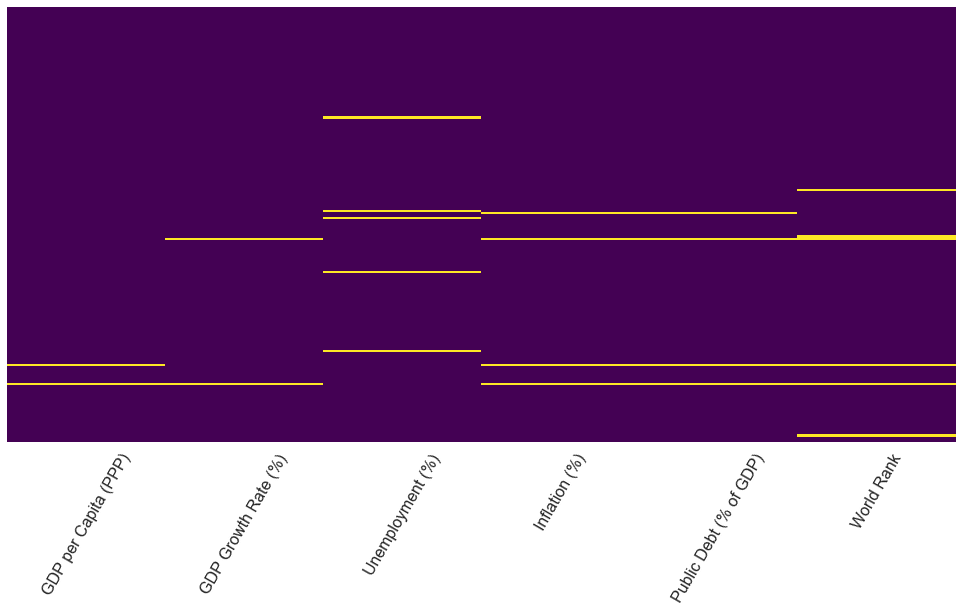

In [7]:
# visualizing nulls in data - helps to understand if nulls are located in the same rows or disperesed
# please, note that this visualization method works only with relatively small number of rows

plt.figure(figsize = (17, 8))
sns.heatmap(data.isnull(), yticklabels = False,cbar = False, cmap ='viridis')
plt.tick_params(labelsize = 16, rotation = 60)

plt.show()

In [ ]:
# yellow bars in the heatmap represent missing values

In [ ]:
# There is a small total number of nulls located in few rows
# So, it is reasonable to eliminate these, instead of trying to fill the nulls

In [8]:
# drop nulls

data_c = data.dropna().reset_index(drop = True)
# always use .reset_index(drop=True) after dropna() or any time a raw is dropped to avoid index mixup between different cols!!!

data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
GDP per Capita (PPP)      174 non-null object
GDP Growth Rate (%)       174 non-null float64
Unemployment (%)          174 non-null object
Inflation (%)             174 non-null float64
Public Debt (% of GDP)    174 non-null float64
World Rank                174 non-null float64
dtypes: float64(4), object(2)
memory usage: 8.3+ KB


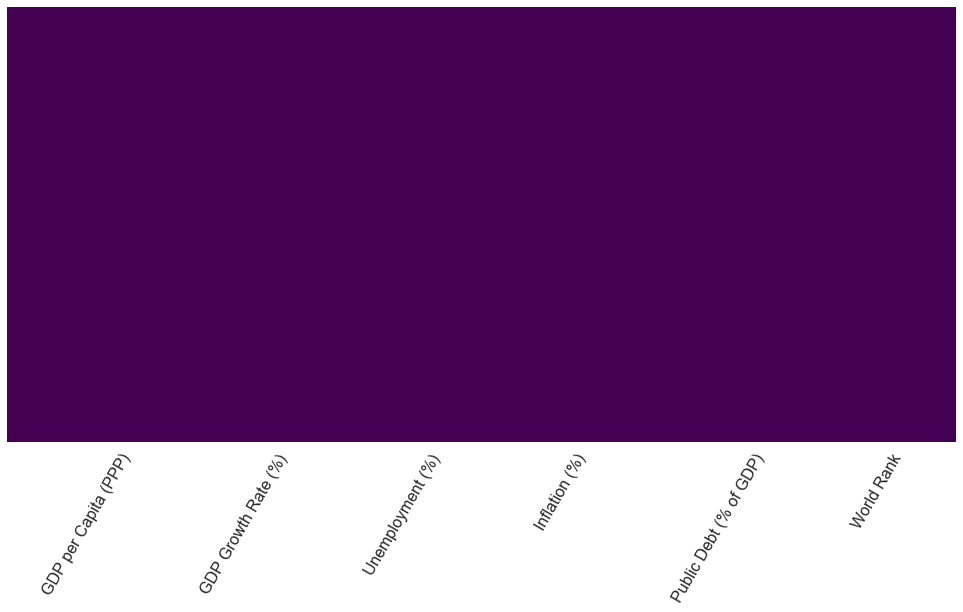

In [9]:
# check for remaining nulls - solid color heatmap indicates no nulls

plt.figure(figsize = (17, 8))
sns.heatmap(data_c.isnull(), yticklabels = False,cbar = False, cmap = 'viridis')
plt.tick_params(labelsize = 16, rotation = 60)

plt.show()

In [10]:
# excellent - no nulls!

data_c.head(5)

,GDP per Capita (PPP),GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP),World Rank
0,1957.58,2.505,8.8,5.0,7.3,152.0
1,12506.6,3.900,13.9,2.0,71.2,52.0
2,15237.2,2.000,10,5.6,25.8,171.0
3,6752.58,0.700,8.2,31.7,65.3,156.0
4,20875.8,2.900,8.7,25.7,52.6,148.0


In [11]:
# this is where we use World Rank to sort the countries for easier creation of classes later on

data_c = data_c.sort_values('World Rank')

data_c.head(20)

,GDP per Capita (PPP),GDP Growth Rate (%),Unemployment (%),Inflation (%),Public Debt (% of GDP),World Rank
71,61393.3,3.800,3.1,1.5,0.1,1.0
140,93905.5,3.600,2,0.6,110.9,2.0
114,38933.8,3.035,4.9,1.9,26.4,3.0
150,61421.8,1.100,4.8,0.5,42.8,4.0
6,50333.7,2.300,5.6,2.0,41.6,5.0
77,75538.4,7.800,6.4,0.3,68.5,6.0
165,44117.7,1.800,4.3,2.7,87.0,7.0
29,48265.2,3.000,6.3,1.6,89.7,8.0
164,67740.9,0.500,1.7,2.0,19.5,9.0
151,50293.5,2.790,3.8,0.6,35.2,10.0


In [ ]:
# quick examination of the values in each of the selected features
# as we can see from the table, there is no strict ordering of the values of these features by World Rank
# e.g. GDP per Capita doesn't have the largest vaules on top; Public Debt doesn't have the smallest values on top, and so on
# thus, at first glance the features are not in direct high correaltion with World Rank

In [ ]:
# EDA

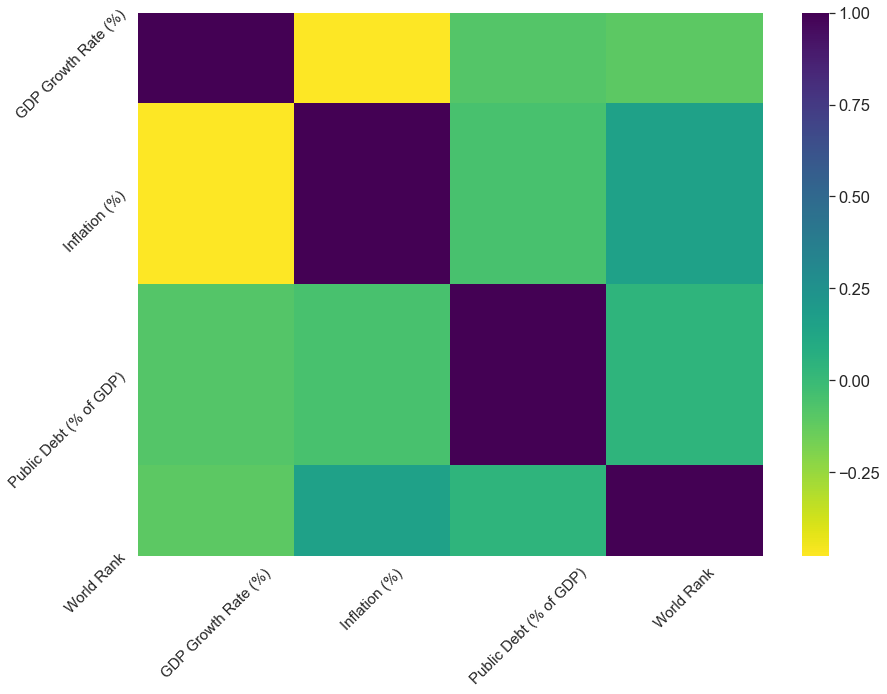

In [12]:
# plot data correlation

plt.figure(figsize = (14, 10))
sns.heatmap(data_c.corr(), cmap = 'viridis_r')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.tick_params(labelsize = 15)
plt.show()

In [ ]:
# as we expected, there is no strong correlation between the data columns

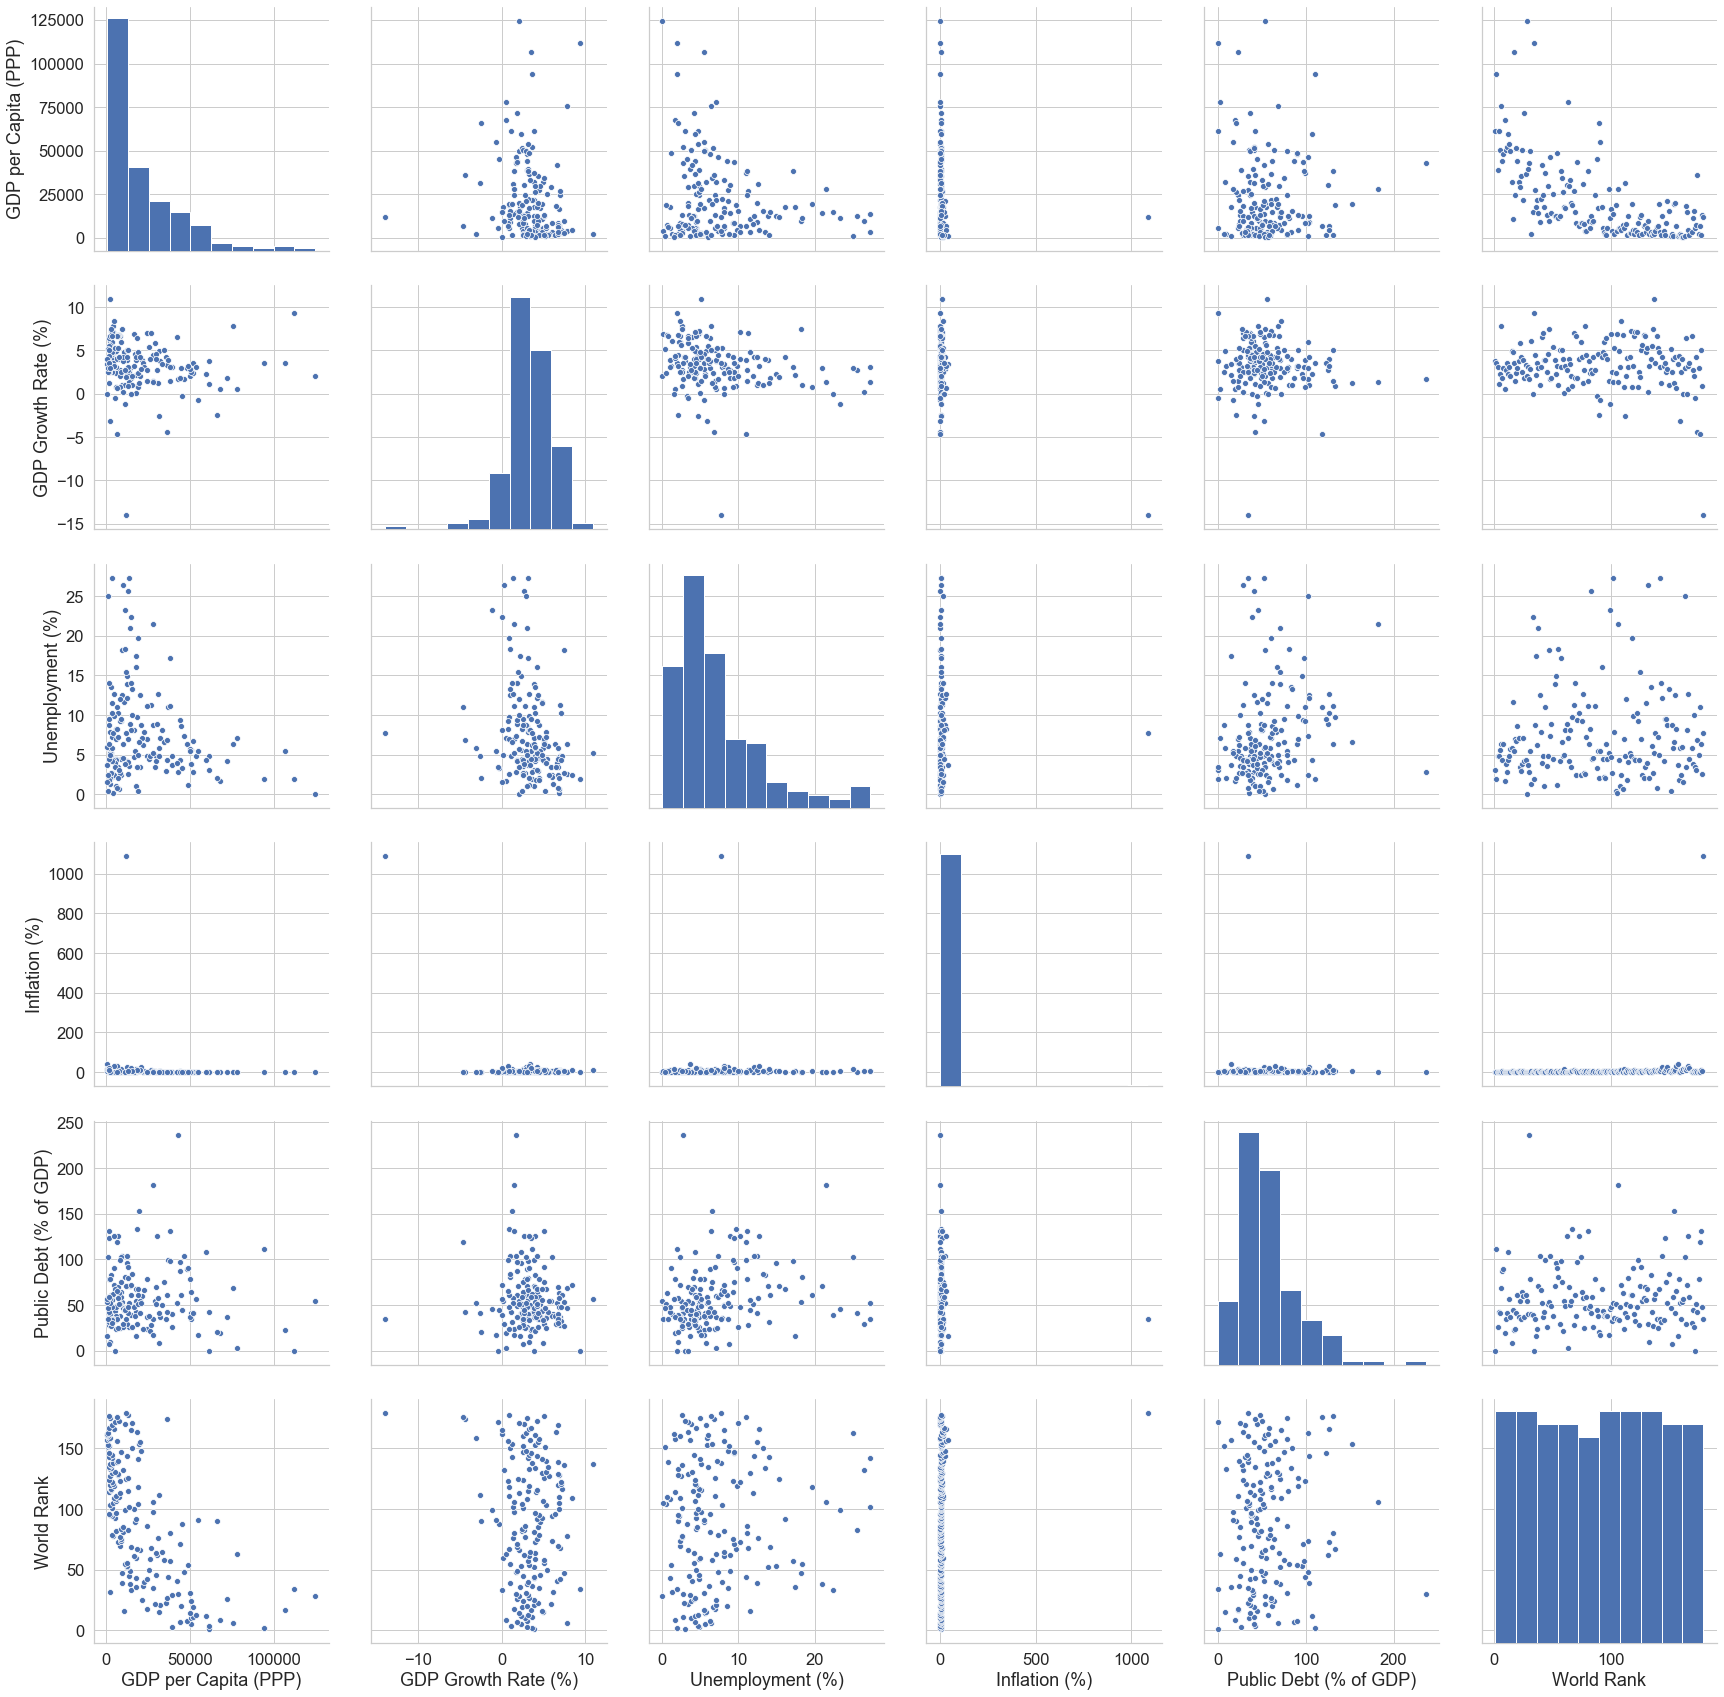

In [13]:
# create pairplot

sns.pairplot(data_c, height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [ ]:
# the first thing that we notice is a single extreme outlier in Inflation
# because this is a single point out of 180 we can eliminate it without affecting our model
# also, some different columns have zero or negative values
    # since these economic factors can be <= 0 we will leave them as is

In [14]:
# eliminate the Inflation outlier - threshold of 500 is appropriate

data_c = data_c[data_c['Inflation (%)'] < 500]
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 71 to 42
Data columns (total 6 columns):
GDP per Capita (PPP)      173 non-null object
GDP Growth Rate (%)       173 non-null float64
Unemployment (%)          173 non-null object
Inflation (%)             173 non-null float64
Public Debt (% of GDP)    173 non-null float64
World Rank                173 non-null float64
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


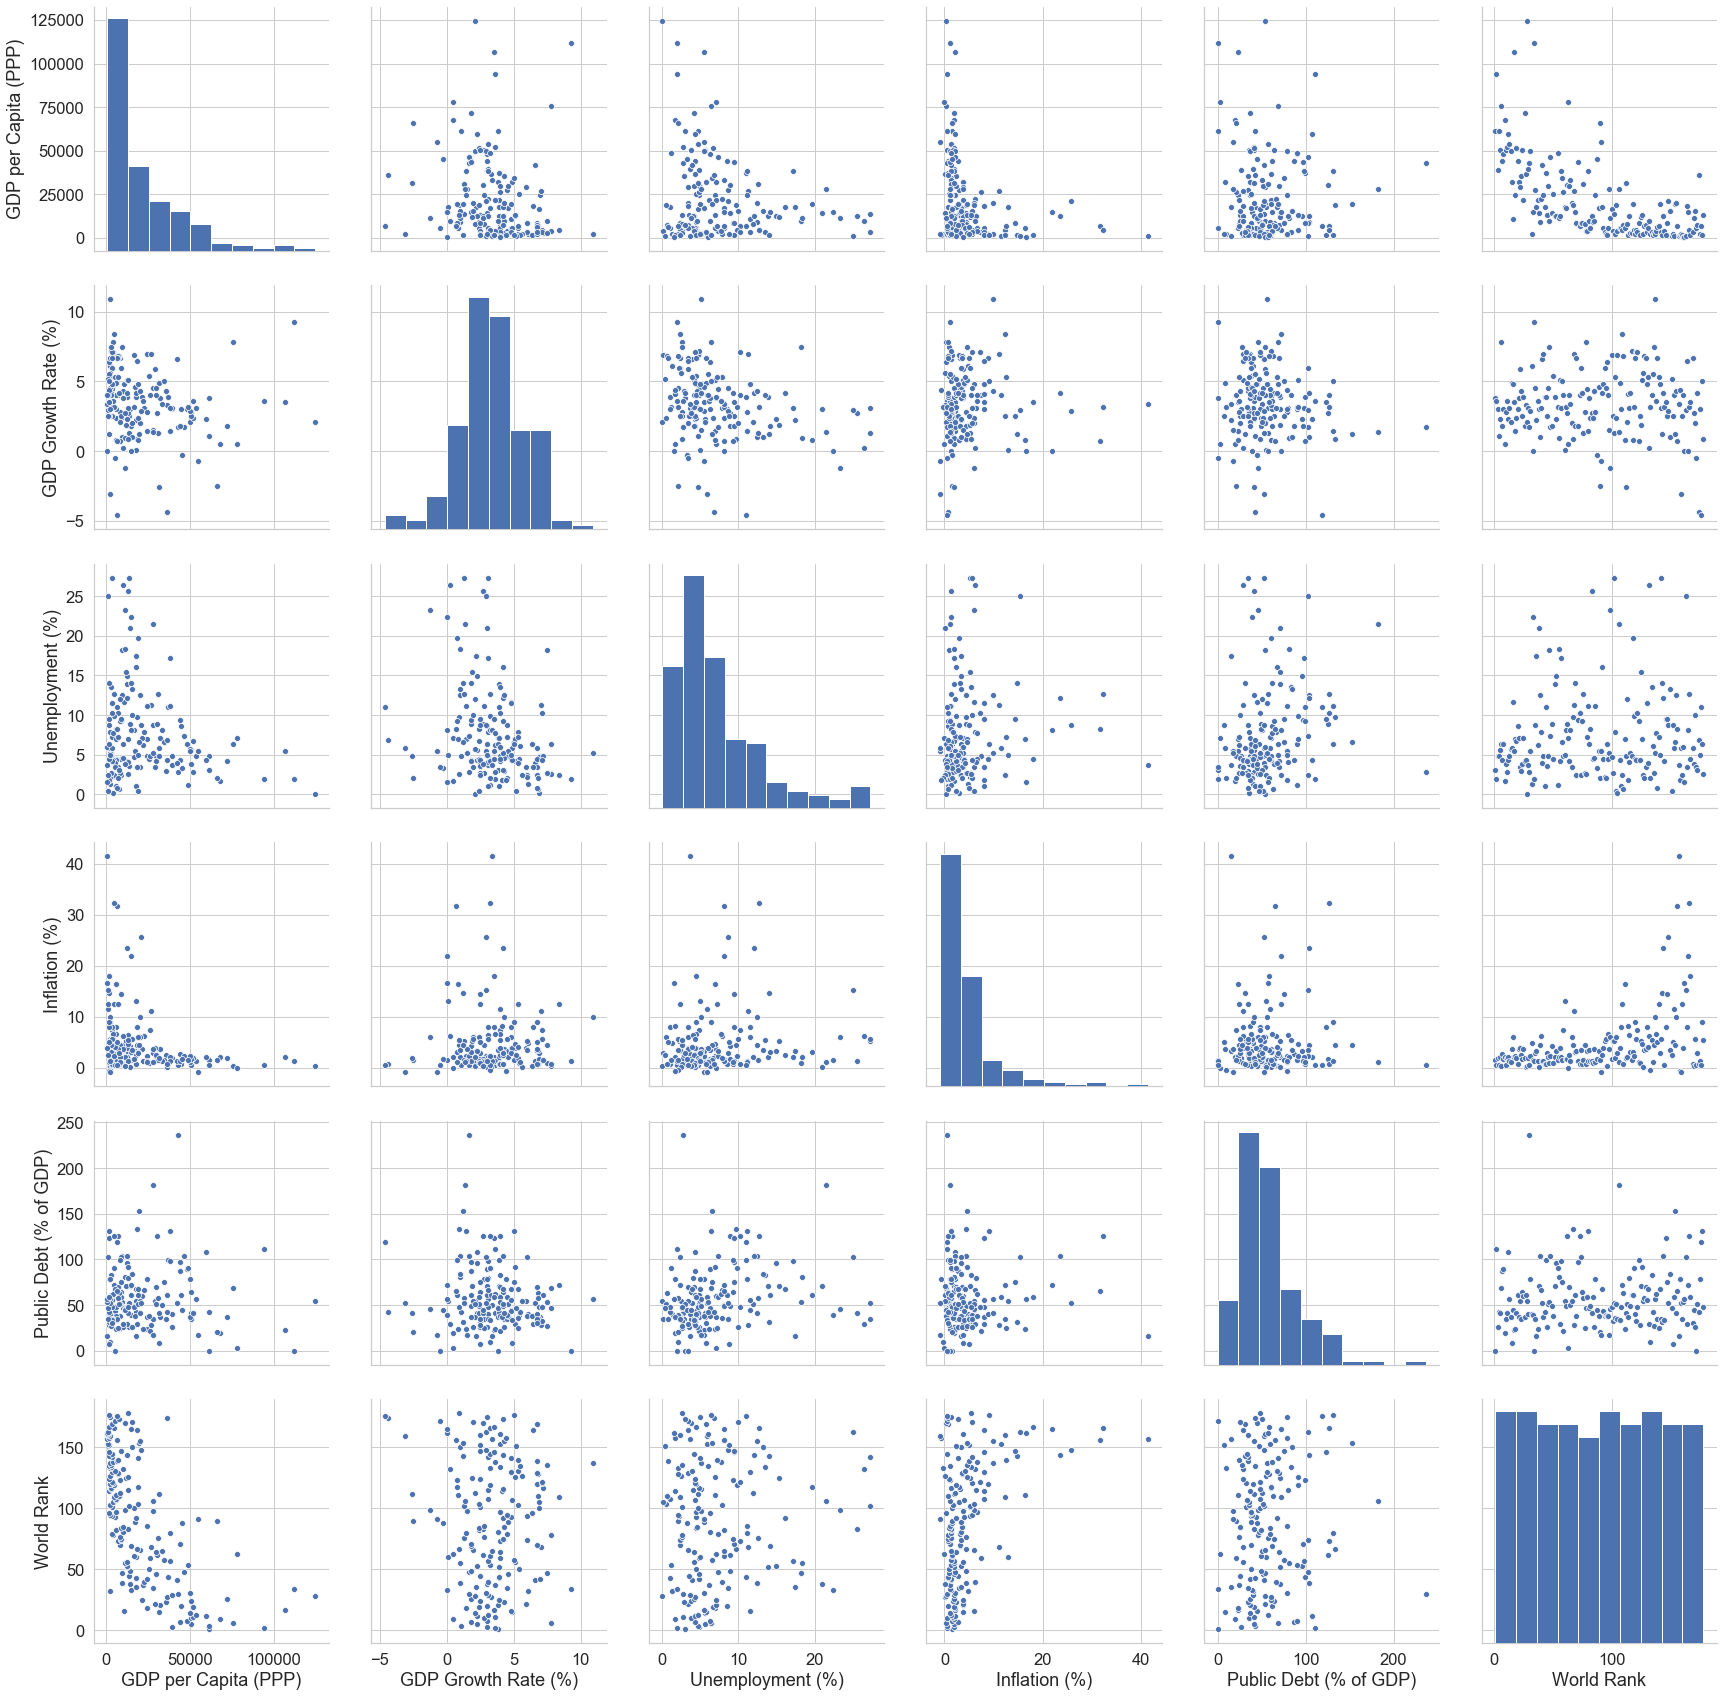

In [15]:
# we are left with 173 total entries

# check by plotting again pairplot

sns.pairplot(data_c, height = 4, aspect = 1)
plt.tight_layout
plt.show()

In [16]:
# seems all columns are well-behaving
# last check for GDP per Capita values - because of the scale it is difficult to see if there are 0s among the very small values

print(data_c['GDP per Capita (PPP)'].min())

676.92


In [ ]:
# min value is greater than 0, so data is fine

In [ ]:
# Solving Problem 1, Clustering, using KMeans

In [17]:
# select features, X

X = data_c.iloc[:, :-1].values # all data_c columns, but World Rank

# because KMeans uses distance as a measure of clustering we need to scale X

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_s = scaler.fit_transform(X) # here we choose to create new set of scaled features, X_s, and preserve X for future use

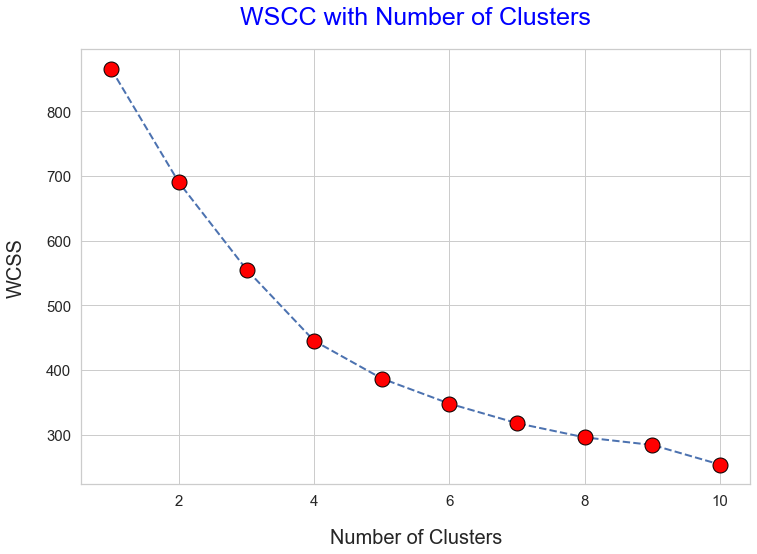

In [18]:
# first determine the optimal number of clusters by applying the elbow method

from sklearn.cluster import KMeans
wcss = [] # designate a placeholder for Within Cluster Sum Squares (WCSS)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_s)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8)) 
plt.plot(range(1, 11), wcss, 'b--', lw = 2, marker = 'o', ms = 15, mfc = 'red', mec = 'black')
plt.title('WSCC with Number of Clusters', fontsize= 25, color = 'blue', pad = 25)
plt.xlabel('Number of Clusters', fontsize= 20, labelpad = 20)
plt.ylabel('WCSS', fontsize= 20, labelpad = 20)
plt.tick_params(labelsize = 15)

plt.show()

In [ ]:
# here, we need to make a judgement call on the optimal number of clusters
# the rule is that we select the number where the last significant change in WCSS occured
# from the plot it appears that this change happens going from 3 to 4 clusters and from there WCSS gradually flattens out

In [19]:
# create KMeans model with n_clusters = 4 and apply it to the scaled data

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(X_s)

# with so many features it is not possible to visualize the clusters
# however, we can find how many countries are in each cluster

from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({0: 90, 2: 39, 1: 32, 3: 12})


In [ ]:
# the number of countries in each of the four clusters/groups is 12, 32, 39, and 90
# we choose to call the clusters classes or tiers (will use the terms interchangably)
# here we need to use some logic to decide the classes and the reasoning goes as follows:
        # we all know that there are few economic superpowers, so these must be the 12 top-ranked countries - 
            # tier 1, count 12
        # then it makes sence that largest number is that of underdeveloped countries - 
            # tier 4, count 90
        # by the same logic, going in descending order and increasing number of countries we designate
            # tier 2, count 32
            # tier 3, count 39
        
# research on coutries grouped by percentage of Globl Economy reveals that our clustrng result is in line with that grouping
# in https://www.investopedia.com/insights/worlds-top-economies/ pie chart separates countries in four groups
    # superpowers or tier 1 - 5 countries (1-5 with 52.7 % of Global Economy)
    # tier 2 - 5 countries (6-10 with 12.8 % of Global Economy)
    # tier 3 - 10 countries (11-20 with 13.3 % of Global Economy)
    # tier 4 - rest (13.3 % of Global Economy)
    
# Our clustering algorithm provided different numbers, but we will point out that we are using different features here
# thus, our grouping does not have to match grouping determined by different factors 
# it is also not quite clear why the pie chart has been split in these particular percentages, so it should not be a rigid guide

In [ ]:
# with this we have finished Problem 1
# we conclude that the countries are grouped in four different classes based on the selected features
# it is a separate problem to figure out the significance of the partitioning of the countries revealed by the clustering

In [ ]:
# Problem 2, Classification:
# we will attempt to create a model which predicts what class different countries belong to based on their features
# we should note that this particular dataset is not suitable for classification
    # frist, there is a large disparity between number of counties in the different classes
    # second, the small sample size makesit difficult to use supervised algorithms
# regardless, we believe that it is worth applying such algorithms and examine the results whatever they might be

In [ ]:
# use Random Forest Classifier (RFC)

In [20]:
# first create labels array based on our clustering results

# initiate array - first 12 elements of the array will represent tier 1
y = np.ones(len(X))

# create labels for tier 2
y[12:44] = 2

# create labels for tier 3
y[44:83] = 3

# create labels for tier 4
y[83:] = 4

y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4.])

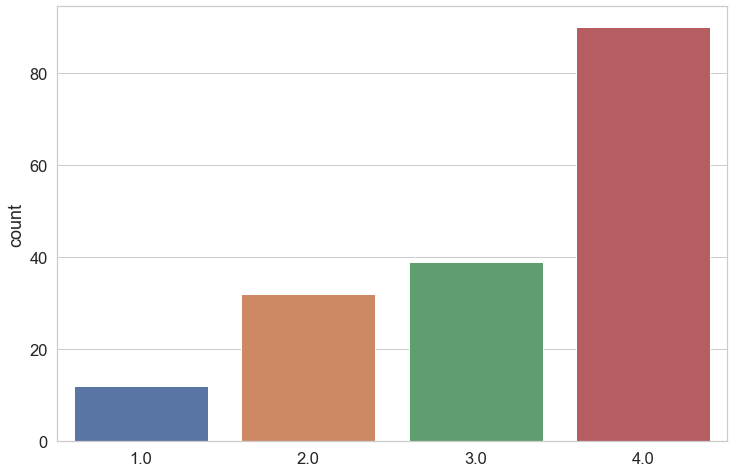

In [22]:
# use countplot to visualize the classes

plt.figure(figsize = (12, 8))
sns.countplot(y)
plt.show()

In [ ]:
# looks right

In [23]:
# split data in train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# here we use the unscaled set of feature, X, because RFC does not require scaling

In [24]:
# Create RandomForestClassifier model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 300, oob_score = True, n_jobs = -1, random_state = 0)

In [25]:
rfc.fit(X_train, y_train)
y_pred_0 = rfc.predict(X_test) 
# good practice is to use indexing of the predictions in order to compare with other results later - 0 for initial model

In [26]:
# compare predictions, y_pred_0, with test data, y_test

from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_0))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred_0))

Confusion Matrix:
[[ 0  2  1  1]
 [ 1  4  1  0]
 [ 0  5  3  3]
 [ 0  0  2 21]]


Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.36      0.67      0.47         6
         3.0       0.43      0.27      0.33        11
         4.0       0.84      0.91      0.87        23

    accuracy                           0.64        44
   macro avg       0.41      0.46      0.42        44
weighted avg       0.60      0.64      0.60        44



In [ ]:
# this is where the small number of samples is hurting the algorithm
# because of the few points in tier 1 y_test has very small chance of having such point and RFC cannot make a prediction
# the small sample size also hurts predictions for classes 2 and 3
# only predictions for class 4 are what one would expect from a good model 
# regarding Cross Validation (CV), our opinion is that due to the small number of samples CV is simply not practical

In [ ]:
# a valid question here is: We have not tuned our model, so would tuning help to improve our model and the predictions?
# let's investigate this by first applying RandomGridSearch, followed by GridSearch in an attempt to optimize the model

In [27]:
# create coarse Random Grid

# n_estimators
n_estimators = list(np.arange(100, 1550, 50))

# max_features
max_features = list(np.arange(0.2, 1.2, 0.2))

# max_depth
max_depth = list(np.arange(10, 110, 10))

# min_samples_split
min_samples_split = [2, 4, 8, 12]

# min_samples_leaf
min_samples_leaf = [1, 2, 3, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [28]:
rfc = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 4, 
                                verbose = 2, random_state = 0, n_jobs = -1) # keep cv small due to the small sample size

In [29]:
rfc_random.fit(X, y)
# run it twice and get best parameters from each run

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.0min finished
C:\Users\marin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [30]:
best_params_1 = rfc_random.best_params_ # results from 1st run

In [31]:
# 2nd run
rfc_random.fit(X, y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   58.2s finished
C:\Users\marin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [32]:
best_params_2 = rfc_random.best_params_

In [33]:
print('Best parameters 1:')
print(best_params_1)
print('Best parameters 2:')
print(best_params_2)

Best parameters 1:
{'n_estimators': 500, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 0.2, 'max_depth': 30}
Best parameters 2:
{'n_estimators': 1200, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 0.2, 'max_depth': 70}


In [34]:
# the two rnadom runs resulted in two different sets of optmal parameters
# create finer grids based on these two sets of parameters and run regular GridSearch

# grid 1
grid_1 = {'n_estimators': [480, 490, 500, 510, 520],
          'min_samples_split': [11, 12, 13],
          'min_samples_leaf': [1, 2, 3],
          'max_features': [0.1, 0.2, 0.3],
          'max_depth': [25, 30, 35]}

# grid 2
grid_2 = {'n_estimators': [1180, 1190, 1200, 1210, 1220],
          'min_samples_split': [7, 8, 9],
          'min_samples_leaf': [1, 2, 3],
          'max_features': [0.1, 0.2, 0.3],
          'max_depth': [60, 70, 80]}

In [35]:
# run RFC with grid 1

from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

rfc_grid = GridSearchCV(rfc, grid_1, refit=True, cv = 4, verbose=2, n_jobs = -1)
rfc_grid.fit(X, y)

Fitting 4 folds for each of 405 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.6min finished
C:\Users\marin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [36]:
best_params_g1 = rfc_grid.best_params_ # grid 1 results

In [37]:
# run grid 2

rfc_grid = GridSearchCV(rfc, grid_2, refit=True, cv = 4, verbose=2, n_jobs = -1)
rfc_grid.fit(X, y)

Fitting 4 folds for each of 405 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  5.7min finished
C:\Users\marin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [38]:
best_params_g2 = rfc_grid.best_params_ # grid 2 results

In [39]:
print('Best parameters: grid 1')
print(best_params_g1)
print('Best parameters: grid 2')
print(best_params_g2)

Best parameters: grid 1
{'max_depth': 30, 'max_features': 0.1, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 520}
Best parameters: grid 2
{'max_depth': 70, 'max_features': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 1190}


In [40]:
# create 2 models with these parameters and apply to data

rfc_opt1 = RandomForestClassifier(n_estimators = 520, max_depth = 30, max_features = 0.1, min_samples_leaf = 3, 
                                  min_samples_split = 13, n_jobs = -1, random_state = 0)

rfc_opt2 = RandomForestClassifier(n_estimators = 1190, max_depth = 70, max_features = 0.3, min_samples_leaf = 2, 
                                  min_samples_split = 7, n_jobs = -1, random_state = 0)

In [41]:
# apply the models

rfc_opt1.fit(X_train, y_train)
y_pred_opt1 = rfc_opt1.predict(X_test)

rfc_opt2.fit(X_train, y_train)
y_pred_opt2 = rfc_opt2.predict(X_test)

In [42]:
# copmare rfc_opt1 predictions with y_test

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred_opt1))

Confusion Matrix:
[[ 0  3  0  1]
 [ 0  5  0  1]
 [ 0  3  2  6]
 [ 0  0  1 22]]


Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.45      0.83      0.59         6
         3.0       0.67      0.18      0.29        11
         4.0       0.73      0.96      0.83        23

    accuracy                           0.66        44
   macro avg       0.46      0.49      0.43        44
weighted avg       0.61      0.66      0.59        44



C:\Users\marin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# copmare rfc_opt2 predictions with y_test

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt2))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred_opt2))

Confusion Matrix:
[[ 0  3  0  1]
 [ 0  5  0  1]
 [ 0  3  3  5]
 [ 0  0  1 22]]


Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.45      0.83      0.59         6
         3.0       0.75      0.27      0.40        11
         4.0       0.76      0.96      0.85        23

    accuracy                           0.68        44
   macro avg       0.49      0.52      0.46        44
weighted avg       0.65      0.68      0.62        44



In [ ]:
# the results from both models are similar with second model having a slight edge
# note: there is no class 1 data point in test data - that's why the 0 scores
# of tiers 2, 3, and 4 most accurate predictions are for tier 4 as expected (largest number of samples), 
# predictions for tiers 2 and 3 are similar, which is not surprising given the similar sample size

In [44]:
# compare with initial predictions, y_pred_0 

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_0))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred_0))

Confusion Matrix:
[[ 0  2  1  1]
 [ 1  4  1  0]
 [ 0  5  3  3]
 [ 0  0  2 21]]


Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.36      0.67      0.47         6
         3.0       0.43      0.27      0.33        11
         4.0       0.84      0.91      0.87        23

    accuracy                           0.64        44
   macro avg       0.41      0.46      0.42        44
weighted avg       0.60      0.64      0.60        44



In [ ]:
# it is clear that the model tuning improved the prediction accuracy, patricularly for tiers 2 and 3

In [ ]:
# Summary
# Two different problems have been postulated in regard with the data - 1) Clustering and 2) Classification
# Clustering - 
    # data was succesfully segmented in four classes with 12, 32, 39, and 90 countries in class 1, 2, 3, and 4, respectively
    # the meaning of this segmentation is a subject of future work and requires knowlege in Economics, not Data Science only
# Classification - 
    # despite the small sample size, the RFC model did a relatively good job of predicting the countries class based on feature values